In [ ]:
!pip install git+https://github.com/adrn/pyia

In [1]:
# Third-party
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import binned_statistic_2d

from pyia import GaiaData

In [6]:
galah = GaiaData('/Users/adrian/data/GaiaDR2/GALAH-GaiaDR2-xmatch.fits')
galah = galah[(galah.parallax / galah.parallax_error) > 6.]

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [10]:
c = galah.get_skycoord(radial_velocity=galah.rv_synt)

In [11]:
galcen = c.transform_to(coord.Galactocentric(z_sun=0*u.pc))

### First plot $z$-$v_z$, no abundances:

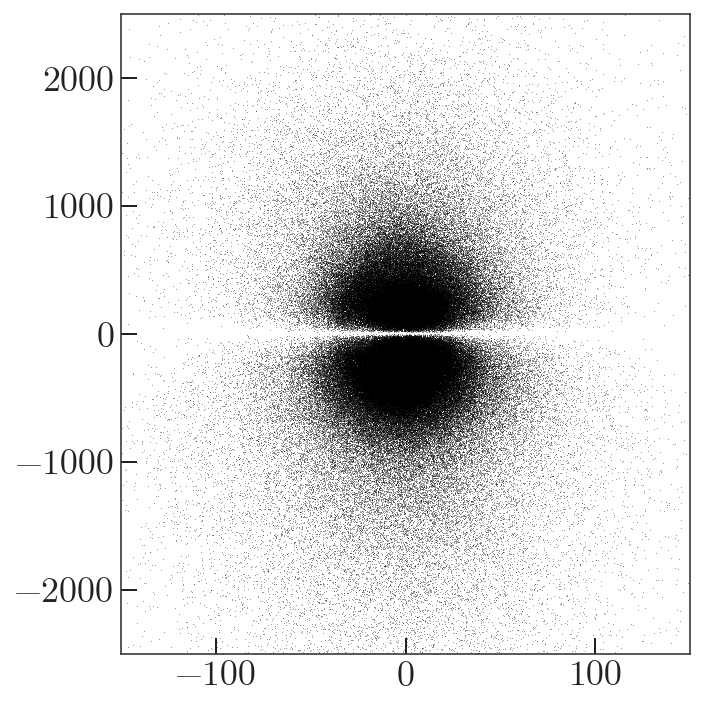

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(galcen.v_z.to(u.km/u.s).value, 
        galcen.z.to(u.pc).value,
        marker=',', ls='none', color='k', alpha=0.4)
ax.set_xlim(-150, 150)
ax.set_ylim(-2500, 2500)
fig.tight_layout()

### Compute 2D mean abundances

In [41]:
stat = binned_statistic_2d(galcen.v_z.to(u.km/u.s).value, 
                           galcen.z.to(u.pc).value,
                           galah.mg_fe,
                           bins=(np.arange(-180, 180+1e-3, 2.5),
                                 np.arange(-2500, 2500+1e-3, 10)),
                           statistic=np.nanmean)

/Users/adrian/anaconda/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:600: RuntimeWarning: Mean of empty slice
  result[vv, i] = statistic(values[vv, binnumbers == i])


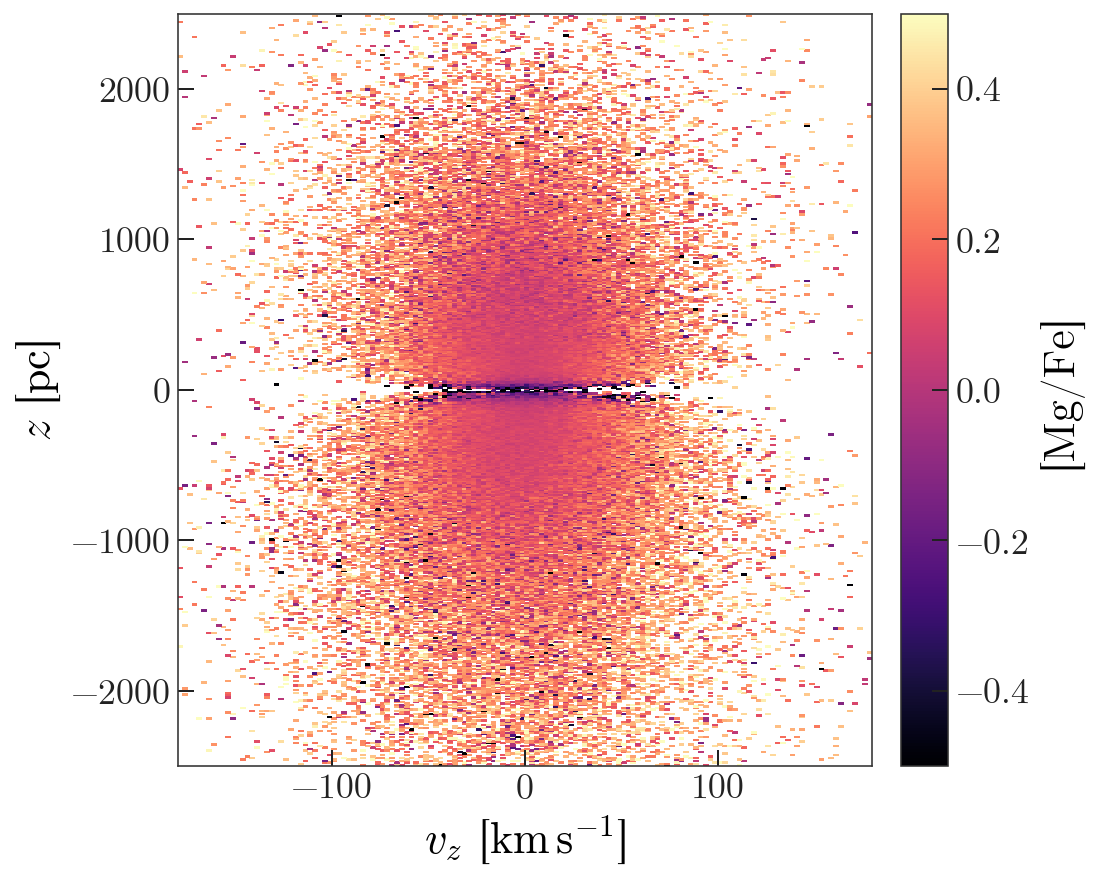

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6), 
                       constrained_layout=True)

cs = ax.pcolormesh(stat.x_edge, stat.y_edge, stat.statistic.T,
                   vmin=-0.5, vmax=0.5, cmap='magma')

ax.set_xlabel('$v_z$ [{0:latex_inline}]'.format(u.km/u.s))
ax.set_ylabel('$z$ [{0:latex_inline}]'.format(u.pc))

cb = fig.colorbar(cs)
cb.set_label('[Mg/Fe]')

The zoom in:

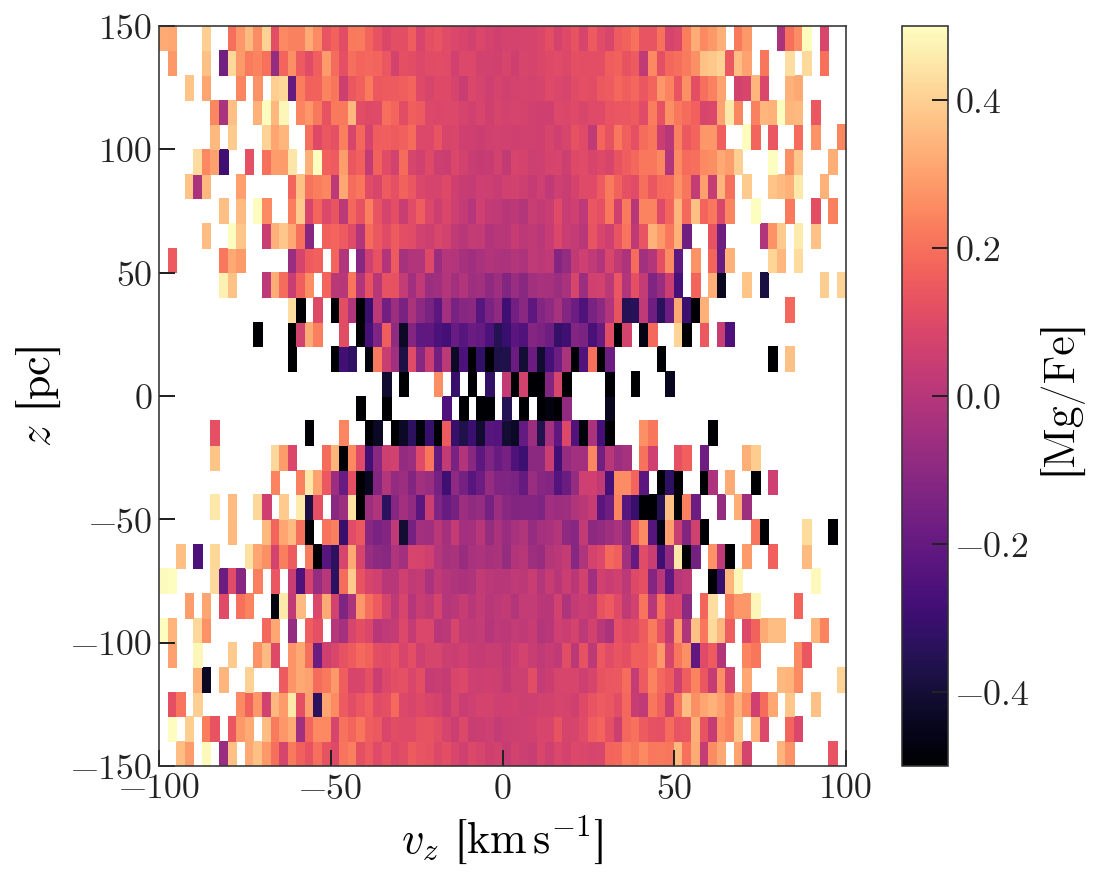

In [62]:
stat = binned_statistic_2d(galcen.v_z.to(u.km/u.s).value, 
                           galcen.z.to(u.pc).value,
                           galah.mg_fe,
                           bins=(np.arange(-100, 100+1e-3, 2.5),
                                 np.arange(-150, 150+1e-3, 10)),
                           statistic=np.nanmean)

fig, ax = plt.subplots(1, 1, figsize=(7.5, 6), 
                       constrained_layout=True)

cs = ax.pcolormesh(stat.x_edge, stat.y_edge, stat.statistic.T,
                   vmin=-0.5, vmax=0.5, cmap='magma')

ax.set_xlabel('$v_z$ [{0:latex_inline}]'.format(u.km/u.s))
ax.set_ylabel('$z$ [{0:latex_inline}]'.format(u.pc))

cb = fig.colorbar(cs)
cb.set_label('[Mg/Fe]')